Accuracy: 0.8777188328912466
Precision: 0.8912615325368577
Recall: 0.8683560591111753
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.85      0.85      0.85       151
           comp.graphics       0.88      0.84      0.86       202
 comp.os.ms-windows.misc       0.86      0.85      0.85       195
comp.sys.ibm.pc.hardware       0.64      0.85      0.73       183
   comp.sys.mac.hardware       0.94      0.87      0.90       205
          comp.windows.x       0.95      0.85      0.90       215
            misc.forsale       0.93      0.72      0.81       193
               rec.autos       0.91      0.94      0.92       196
         rec.motorcycles       0.89      0.95      0.92       168
      rec.sport.baseball       0.95      0.95      0.95       211
        rec.sport.hockey       0.90      0.99      0.94       198
               sci.crypt       0.91      0.97      0.93       201
         sci.electronics       0

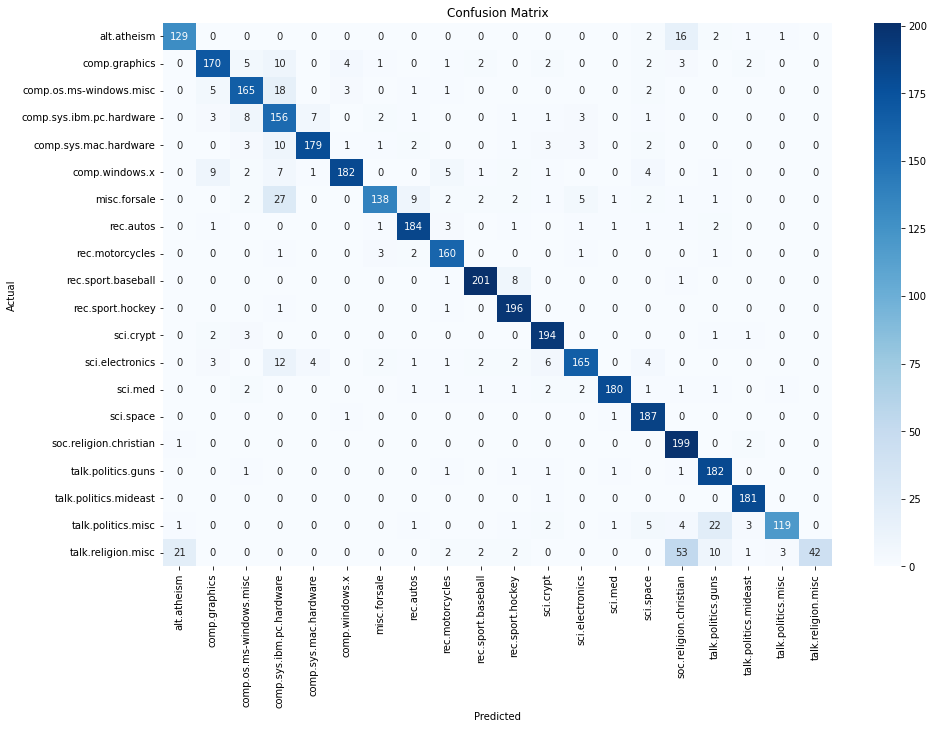

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Create a DataFrame
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

# Preprocess the text data
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['text'])

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['target'], test_size=0.2, random_state=42)

# Train the Naïve Bayesian Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()